# <a id='0'> Dataset Introduction</a>
The data set includes data from a direct marketer who sells his products only via direct mail. He sends catalogs with product characteristics to customers who then order directly from the catalogs. The marketer has developed customer records to learn what makes some customers spend more than others.

# <a id='1'> 1.Importing Libraries</a>

In [1]:
#load dependecies

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/direct-marketing/DirectMarketing.csv


In [2]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt
# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [3]:
Direct_Marketing=pd.read_csv("/kaggle/input/direct-marketing/DirectMarketing.csv")
df=Direct_Marketing.copy()
df.head(25)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304
5,Young,Male,Own,Married,Close,30400,0,Low,6,495
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,782
7,Middle,Male,Own,Single,Close,68400,0,High,18,1155
8,Middle,Female,Own,Married,Close,51900,3,Low,6,158
9,Old,Male,Own,Married,Far,80700,0,NaN,18,3034


 # <a id='3'> 3.Exploratory Data Analysis</a>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB



* Data has only object and integer values.
* Variable column has not missing values.

In [5]:
# Columns Types
df.dtypes

Age            object
Gender         object
OwnHome        object
Married        object
Location       object
Salary          int64
Children        int64
History        object
Catalogs        int64
AmountSpent     int64
dtype: object

In [6]:
# Size Of Data Set
df.shape

(1000, 10)

* Dataset comprises of 1000 observations and 10 characteristics.

In [7]:
# Duplicated data
df[df.duplicated() == True]

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent


* We don't have duplicated data

In [8]:
# Unique Value
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Age': ['Old', 'Middle', 'Young'],
 'Gender': ['Female', 'Male'],
 'OwnHome': ['Own', 'Rent'],
 'Married': ['Single', 'Married'],
 'Location': ['Far', 'Close'],
 'History': ['High', 'Low', 'Medium', nan]}

## <a id='4'> 3.1 Missing Value</a>

In [9]:
df.isnull().values.any()

True

In [10]:
df.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

In [11]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
History,303,30.3
AmountSpent,0,0.0
Catalogs,0,0.0
Children,0,0.0
Salary,0,0.0
Location,0,0.0
Married,0,0.0
OwnHome,0,0.0
Gender,0,0.0
Age,0,0.0


## <a id='7'> 4.Data Analysis </a>

* How much is the average salary,amount spent by age?

In [20]:
# Scatter plot - Category

fig = px.scatter(df, x='Salary', y='AmountSpent',trendline="ols",
                 color='Age') # Added color to basic scatter
fig.update_layout(title='Age With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

## <a id='9'> 4.2 Gender </a>
* How is the gender distribution ?

In [21]:
df_Gender=df['Gender'].value_counts().to_frame().reset_index().rename(columns={'index':'Gender','Gender':'count'})
df_Gender

,Gender,count
0,Female,506
1,Male,494


* Gender distribution is balanced

In [22]:
fig = go.Figure(go.Bar(
    x=df_Gender['Gender'],y=df_Gender['count'],
    marker={'color': df_Gender['count'], 
    'colorscale': 'Viridis'},  
    text=df_Gender['count'],
    textposition = "outside",
))
fig.update_layout(title_text='Gender Distribution',xaxis_title="Gender",yaxis_title="Count ",title_x=0.5)
fig.show()

* How much is the average salary,amount spent by Gender

* Men earn more and spend more

In [24]:
# Scatter plot - Category

fig = px.scatter(df, x='Salary', y='AmountSpent',trendline="ols",
                 color='Gender') # Added color to basic scatter
fig.update_layout(title='Gender With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

* How is the age distribution by gender?

In [25]:
df_G_and_A=df.groupby(by =['Gender','Age'])['Married'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','Married':'count'})
df_G_and_A

,Gender,Age,count
0,Female,Middle,206
1,Female,Old,129
2,Female,Young,171
3,Male,Middle,302
4,Male,Old,76
5,Male,Young,116


* The highest number of customers is middle age men
* Lowest number of customers older men

In [26]:
df_G_and_A=df.groupby(by =['Gender','Age'])['Married'].count().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','Married':'count'})

fig = px.bar(df_G_and_A, x="Age", y="count",color="Gender",barmode="group",
             
             )
fig.update_layout(title_text='Age Count With Gender',title_x=0.5,yaxis_title="Count",
                 )
fig.show()

* How much is the average(min,max) spending amount of customers by gender,age?


In [27]:
df_G_and_A=df.groupby(by =['Gender','Age'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'AmountSpent':'AVG_AmountSpent'})
df_G_and_A["AVG_AmountSpent"]=df_G_and_A["AVG_AmountSpent"].map(lambda x:round(x,2))
df_G_and_A

,Gender,Age,AVG_AmountSpent
0,Female,Middle,1301.34
1,Female,Old,1279.31
2,Female,Young,501.26
3,Male,Middle,1638.35
4,Male,Old,1691.51
5,Male,Young,643.19


Highest average spending:**Male**	**Old** 1691 <br>
Lowest average spending: **Female**	**Young** 501 <br>

In [28]:
df_G_and_A=df.groupby(by =['Gender','Age'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'AmountSpent':'AVG_AmountSpent'})
df_G_and_A["AVG_AmountSpent"]=df_G_and_A["AVG_AmountSpent"].map(lambda x:round(x,2))

fig = px.bar(df_G_and_A, x="Age", y="AVG_AmountSpent",color="Gender",barmode="group",
             
             )
fig.update_layout(title_text='Age Amount Spent With Gender,Age',title_x=0.5,yaxis_title="Amount Spent",
                 )
fig.show()

* What is the average spending of customers by gender and age?

In [29]:
df_age_gender_agg=df.groupby(by=["Age","Gender"])['AmountSpent'].agg(["min","mean","max"])
df_age_gender_agg

min         mean   max
Age    Gender                        
Middle Female  158  1301.339806  5830
       Male    157  1638.354305  5878
Old    Female   65  1279.310078  5564
       Male    297  1691.513158  6217
Young  Female   47   501.257310  3688
       Male     38   643.189655  1692

In [30]:
df_G_and_A_AVG=df.groupby(by =['Gender','Age'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','AmountSpent':'AVG_AmountSpent'})
df_G_and_A_Max=df.groupby(by =['Gender','Age'])['AmountSpent'].max().to_frame().reset_index().rename(columns={'Gender':'Gender1','Age':'Age1','AmountSpent':'Max_AmountSpent'})
df_G_and_A_Min=df.groupby(by =['Gender','Age'])['AmountSpent'].min().to_frame().reset_index().rename(columns={'Gender':'Gender2','Age':'Age2','AmountSpent':'Min_AmountSpent'})
df_G_and_A_Count=df.groupby(by =['Gender','Age'])['AmountSpent'].count().to_frame().reset_index().rename(columns={'Gender':'Gender3','Age':'Age3','AmountSpent':'Count'})
result = pd.concat([df_G_and_A_AVG, df_G_and_A_Max,df_G_and_A_Min,df_G_and_A_Count], axis=1)
result.drop(['Gender1','Gender2','Gender3','Age1','Age2','Age3'],inplace=True,axis=1)
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result["Gender_Age"]=result["Gender"]+" "+result["Age"]
result.drop(['Gender','Age'],inplace=True,axis=1)
result

,AVG_AmountSpent,Max_AmountSpent,Min_AmountSpent,Count,Gender_Age
0,1301.34,5830,158,206,Female Middle
1,1279.31,5564,65,129,Female Old
2,501.26,3688,47,171,Female Young
3,1638.35,5878,157,302,Male Middle
4,1691.51,6217,297,76,Male Old
5,643.19,1692,38,116,Male Young


In [31]:
df_G_and_A_AVG=df.groupby(by =['Gender','Age'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','AmountSpent':'AVG_AmountSpent'})
df_G_and_A_Max=df.groupby(by =['Gender','Age'])['AmountSpent'].max().to_frame().reset_index().rename(columns={'Gender':'Gender1','Age':'Age1','AmountSpent':'Max_AmountSpent'})
df_G_and_A_Min=df.groupby(by =['Gender','Age'])['AmountSpent'].min().to_frame().reset_index().rename(columns={'Gender':'Gender2','Age':'Age2','AmountSpent':'Min_AmountSpent'})
df_G_and_A_Count=df.groupby(by =['Gender','Age'])['AmountSpent'].count().to_frame().reset_index().rename(columns={'Gender':'Gender3','Age':'Age3','AmountSpent':'Count'})
result = pd.concat([df_G_and_A_AVG, df_G_and_A_Max,df_G_and_A_Min,df_G_and_A_Count], axis=1)
result.drop(['Gender1','Gender2','Gender3','Age1','Age2','Age3'],inplace=True,axis=1)
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result["Gender_Age"]=result["Gender"]+" "+result["Age"]
result.drop(['Gender','Age'],inplace=True,axis=1)

fig = make_subplots(rows=4, cols=1,
                   subplot_titles=(" Mean Amount Spent",
                                   " Min Amount Spent",
                                   " Max Amount Spent",
                                   " Count "))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['AVG_AmountSpent'],
    name="Mean",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['Min_AmountSpent'],
    name="Min",
    marker={'color': result['Min_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['Min_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['Max_AmountSpent'],
    name="Max",
    marker={'color': result['Max_AmountSpent'], 
    'colorscale': 'fall'},  
    text=result['Max_AmountSpent'],
    textposition = "inside"),
    row=3, col=1           
)
fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['Count'],
    name="Count",
    marker={'color': result['Count'], 
    'colorscale': 'fall'},  
    text=result['Count'],
    textposition = "inside"),
    row=4, col=1           
)
fig.update_layout(title = "Gender Age With Amount Spent",title_x=0.5)
fig.update_xaxes(
        tickangle = 0,
        )
fig.show()

* What are the customers' average income by gender,age?

In [32]:
df_age_gender_agg=df.groupby(by=["Age","Gender"])['Salary'].agg(["min","mean","max"])
df_age_gender_agg

min          mean     max
Age    Gender                             
Middle Female  25300  65787.864078  135700
       Male    34200  76298.675497  140700
Old    Female  10100  50213.953488  128700
       Male    15400  66807.894737  168800
Young  Female  10200  25485.380117   79400
       Male    10200  31003.448276   80700

In [33]:
df_G_and_A_AVG=df.groupby(by =['Gender','Age'])['Salary'].mean().to_frame().reset_index().rename(columns={'Gender':'Gender','Age':'Age','Salary':'AVG_Salary'})
df_G_and_A_Max=df.groupby(by =['Gender','Age'])['Salary'].max().to_frame().reset_index().rename(columns={'Gender':'Gender1','Age':'Age1','Salary':'Max_Salary'})
df_G_and_A_Min=df.groupby(by =['Gender','Age'])['Salary'].min().to_frame().reset_index().rename(columns={'Gender':'Gender2','Age':'Age2','Salary':'Min_Salary'})
df_G_and_A_Count=df.groupby(by =['Gender','Age'])['Salary'].count().to_frame().reset_index().rename(columns={'Gender':'Gender3','Age':'Age3','Salary':'Count'})
result = pd.concat([df_G_and_A_AVG, df_G_and_A_Max,df_G_and_A_Min,df_G_and_A_Count], axis=1)
result.drop(['Gender1','Gender2','Gender3','Age1','Age2','Age3'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["Gender_Age"]=result["Gender"]+" "+result["Age"]
result.drop(['Gender','Age'],inplace=True,axis=1)


fig = make_subplots(rows=4, cols=1,
                   subplot_titles=(" Mean Salary",
                                   " Min Salary",
                                   " Max Salary",
                                   " Count "))  # Subplot titles

fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['AVG_Salary'],
    name="Mean",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'fall'},  
    text=result['AVG_Salary'],
    textposition = "inside"),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['Min_Salary'],
    name="Min",
    marker={'color': result['Min_Salary'], 
    'colorscale': 'fall'},  
    text=result['Min_Salary'],
    textposition = "inside"),
    row=2, col=1         
)
fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['Max_Salary'],
    name="Max",
    marker={'color': result['Max_Salary'], 
    'colorscale': 'fall'},  
    text=result['Max_Salary'],
    textposition = "inside"),
    row=3, col=1           
)
fig.add_trace(go.Bar(
    x=result['Gender_Age'],y=result['Count'],
    name="Count",
    marker={'color': result['Count'], 
    'colorscale': 'fall'},  
    text=result['Count'],
    textposition = "inside"),
    row=4, col=1           
)
fig.update_layout(title = "Gender Age With Salary",title_x=0.5)
fig.update_xaxes(
        tickangle = 0,
        )
fig.show()

## Summary
* Gender distribution is balanced
* Men earn more and spend more

* The highest number of customers is middle age men
* Lowest number of customers older men

* Highest average spending:Male Old 1691
* Lowest average spending: Female Young 501

* Highest average Salary:Male Middle 76.3 k
* Lowest average Salary: Female Young 25.5 k

In [38]:
# Scatter plot - Category

fig = px.scatter(df, x='Salary', y='AmountSpent',trendline="ols",
                 color='OwnHome') # Added color to basic scatter
fig.update_layout(title='Own Home With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

In [42]:
# Scatter plot - Category

fig = px.scatter(df, x='Salary', y='AmountSpent',trendline="ols",
                 color='Married') # Added color to basic scatter
fig.update_layout(title='Married With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

In [46]:
# Scatter plot - Category

fig = px.scatter(df, x='Salary', y='AmountSpent',trendline="ols",
                 color='Location') # Added color to basic scatter
fig.update_layout(title='Location With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

In [52]:
# Scatter plot - Category
df['Children']=df['Children'].astype('object')
fig = px.scatter(df, x='Salary', y='AmountSpent',trendline="ols",
                 color='Children') # Added color to basic scatter
fig.update_layout(title='Children With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

## Summary
* 46 percent of customers don't have Children
* Although customers' incomes were close, there was a decrease in spending as the number of children increased

## <a id='14'> 4.7 History </a>
* How is the History distribution ?

In [53]:
df_missing=df.copy()
df_History=df_missing['History'].value_counts().to_frame().reset_index().rename(columns={'index':'History','History':'count'})
df_History

,History,count
0,High,255
1,Low,230
2,Medium,212


In [54]:
df_missing["History"]=df_missing["History"].fillna("None")

In [55]:
df_History=df_missing['History'].value_counts().to_frame().reset_index().rename(columns={'index':'History','History':'count'})
df_History

,History,count
0,None,303
1,High,255
2,Low,230
3,Medium,212


In [56]:
df_History=df_missing['History'].value_counts().to_frame().reset_index().rename(columns={'index':'History','History':'count'})

fig = go.Figure(go.Bar(
    x=df_History['History'],y=df_History['count'],
    marker={'color': df_History['count'], 
    'colorscale': 'Viridis'},  
    text=df_History['count'],
    textposition = "outside",
))
fig.update_layout(title_text='History Distribution',xaxis_title="History",yaxis_title="Count ",title_x=0.5)
fig.show()

* The highest number of customers who prefer us for the first time

In [57]:
df_History_Salary=df_missing.groupby(by =['History'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_History_AmountSpent=df_missing.groupby(by =['History'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'History':'History1','AmountSpent':'AVG_AmountSpent'})
result = pd.concat([df_History_Salary,df_History_AmountSpent], axis=1)
result.drop(['History1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))
result

,History,AVG_Salary,AVG_AmountSpent
0,High,83547.84,2186.14
1,Low,32261.30,357.09
2,Medium,55374.06,950.40
3,None,51616.50,1239.90


In [58]:
df_History_Salary=df_missing.groupby(by =['History'])['Salary'].mean().to_frame().reset_index().rename(columns={'Salary':'AVG_Salary'})
df_History_AmountSpent=df_missing.groupby(by =['History'])['AmountSpent'].mean().to_frame().reset_index().rename(columns={'History':'History1','AmountSpent':'AVG_AmountSpent'})
result = pd.concat([df_History_Salary,df_History_AmountSpent], axis=1)
result.drop(['History1'],inplace=True,axis=1)
result["AVG_Salary"]=result["AVG_Salary"].map(lambda x:round(x,2))
result["AVG_AmountSpent"]=result["AVG_AmountSpent"].map(lambda x:round(x,2))

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("History AVG Salary ",
                                   "History AVG Amount Spent " ))  # Subplot titles
                                  

fig.add_trace(go.Bar(
    x=result['History'],y=result['AVG_Salary'],
    name="Mean Salary",
    marker={'color': result['AVG_Salary'], 
    'colorscale': 'balance'},  
    text=result['AVG_Salary'],
    textposition = "inside"
    ),
    row=1, col=1         
)
fig.add_trace(go.Bar(
    x=result['History'],y=result['AVG_AmountSpent'],
    name="Mean Amount Spent",
    marker={'color': result['AVG_AmountSpent'], 
    'colorscale': 'balance'},  
    text=result['AVG_AmountSpent'],
    textposition = "inside"),
    row=2, col=1         
)

fig.update_layout(title = " History ",title_x=0.5,
                 hoverlabel=dict(
                  bgcolor="white",
                  font_size=16,
                  font_family="Rockwell"))
fig.show()

* Customers with high previous purchasing volume are the group with the highest income and expenditure

In [59]:
# Scatter plot - Category
fig = px.scatter(df_missing, x='Salary', y='AmountSpent',trendline="ols",
                 color='History') # Added color to basic scatter
fig.update_layout(title='History With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

In [64]:
# Scatter plot - Category
df['Catalogs']=df['Catalogs'].astype('object')
fig = px.scatter(df, x='Salary', y='AmountSpent',trendline="ols",
                 color='Catalogs') # Added color to basic scatter
fig.update_layout(title='Catalogs With Salary Vs Amount Spent ',xaxis_title="Salary",yaxis_title="Amount Spent",title_x=0.5)
fig.show()

## <a id='17'> 4.10 Salary </a>
* How is the Salary distribution ?

In [68]:
fig = go.Figure(data=[go.Histogram(x=df['Salary'],  # To get Horizontal plot ,change axis - 
                                  marker_color="Crimson",
                       xbins=dict(
                      start=0, #start range of bin
                      end=150000,  #end range of bin
                      size=5000   #size of bin
                      ))])
fig.update_layout(title="Distribution Of Salary",xaxis_title="Salary ",yaxis_title="Counts",title_x=0.5)
fig.show()

In [69]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=df["Salary"],
    name='Salary',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
))
fig.update_layout(title = "Salary Distribution ",title_x=0.5,
                 )
fig.show()

In [70]:
fig = go.Figure(data=go.Violin(y=df['Salary'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Salary'))

fig.update_layout(yaxis_zeroline=False,title = "Salary  Distribution ",title_x=0.5,)
fig.show()

## Summary
* Salary max:168.8 k
* Salary mean:56.1 k 
* Salary median:53.7 k
* Salary min:10.1 k

## <a id='18'> 5.Distribution </a>

In [71]:
df_missing["one"]=1
df_missing.head()


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,one
0,Old,Female,Own,Single,Far,47500,0,High,6,755,1
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,1
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,1


## <a id='21'>8.Machine Learning  </a>

## <a id='22'>8.1 Data Preprocessing </a>

In [80]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [81]:
df["History"]=df["History"].fillna("None")

In [82]:
Gender_map= {'Male':0,'Female':1}
OwnHome_map= {'Own':1,'Rent':0}
Married_map= {'Married':1,'Single':0}
Location_map= {'Close':1,'Far':0}

In [83]:
df["Gender"]=df["Gender"].map(Gender_map)
df["OwnHome"]=df["OwnHome"].map(OwnHome_map)
df["Married"]=df["Married"].map(Married_map)
df["Location"]=df["Location"].map(Location_map)

In [84]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,1,1,0,0,47500,0,High,6,755
1,Middle,0,0,0,1,63600,0,High,6,1318
2,Young,1,0,0,1,13500,0,Low,18,296
3,Middle,0,1,1,1,85600,1,High,18,2436
4,Middle,1,1,0,1,68400,0,High,12,1304


In [85]:
Age_map= {'Young':1,'Middle':2,'Old':3}
History_map={'None':1,'Low':2,'Medium':3,'High':4}

In [86]:
df["Age"]=df["Age"].map(Age_map)
df["History"]=df["History"].map(History_map)

In [87]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,3,1,1,0,0,47500,0,4,6,755
1,2,0,0,0,1,63600,0,4,6,1318
2,1,1,0,0,1,13500,0,2,18,296
3,2,0,1,1,1,85600,1,4,18,2436
4,2,1,1,0,1,68400,0,4,12,1304


In [88]:
df['Children']=df['Children'].astype('int64')
df['Catalogs']=df['Catalogs'].astype('int64')

Correlation Matrix


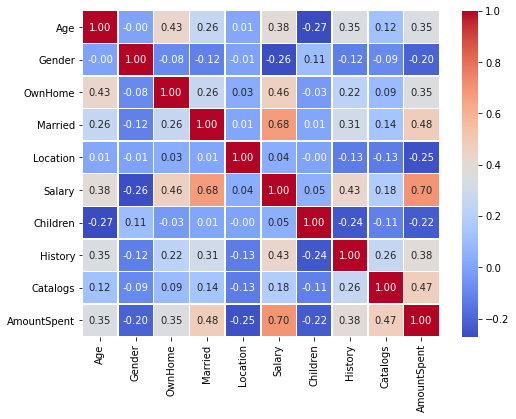

In [89]:
print("Correlation Matrix")
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

 ## <a id='23'> 8.2 Local Outlier Factor</a>


*  The local outlier factor is based on a concept of a local density, where locality is given by k nearest neighbors, whose distance is used to estimate the density. By comparing the local density of an object to the local densities of its neighbors, one can identify regions of similar density, and points that have a substantially lower density than their neighbors. These are considered to be outliers.

In [90]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [91]:
df_out=df.copy()
clf.fit_predict(df_out)
df_scores = clf.negative_outlier_factor_

In [92]:
np.sort(df_scores)[0:50]

array([-5.35656384, -2.20424149, -2.13189388, -1.75377434, -1.66143976,
       -1.61446816, -1.60405079, -1.52348294, -1.52012831, -1.50716982,
       -1.48589474, -1.46446662, -1.44812471, -1.42835164, -1.41373957,
       -1.35196357, -1.32963144, -1.3232883 , -1.32031669, -1.29664795,
       -1.28663583, -1.284672  , -1.26575335, -1.26247264, -1.26152374,
       -1.26120446, -1.26064048, -1.25966086, -1.25893415, -1.25870652,
       -1.25851442, -1.25777984, -1.21625465, -1.21505159, -1.21454469,
       -1.20648146, -1.19948637, -1.19402584, -1.19396162, -1.18660097,
       -1.18492379, -1.18336669, -1.18258878, -1.18082442, -1.17587398,
       -1.17350608, -1.17049969, -1.17020547, -1.16857706, -1.16790855])

In [93]:
threshold_value = np.sort(df_scores)[15]
threshold_value

-1.3519635721835208

In [94]:
Outlier_df= df_out[df_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
69,2,0,1,0,0,72300,0,4,24,4182
91,3,0,1,1,1,134500,0,4,24,4558
102,2,0,0,0,0,59000,0,4,24,3044
126,2,1,1,1,0,44200,0,4,24,2524
138,1,1,1,1,0,68000,0,4,24,3688
169,2,0,1,1,0,140000,0,4,12,4894
267,3,0,1,0,0,62000,0,4,24,3293
307,2,1,1,1,1,130700,3,1,6,2070
534,2,0,1,1,1,140700,3,3,12,1001
705,2,1,1,1,1,131500,3,1,6,2840


In [95]:
# Kick Outliers
for i in indexs:
    df.drop(i, axis = 0,inplace = True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          985 non-null    int64
 1   Gender       985 non-null    int64
 2   OwnHome      985 non-null    int64
 3   Married      985 non-null    int64
 4   Location     985 non-null    int64
 5   Salary       985 non-null    int64
 6   Children     985 non-null    int64
 7   History      985 non-null    int64
 8   Catalogs     985 non-null    int64
 9   AmountSpent  985 non-null    int64
dtypes: int64(10)
memory usage: 84.6 KB


In [97]:
sample_df=df.sample(n=15,random_state=15)
sample_df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
147,3,1,1,1,0,67900,0,4,24,2925
932,2,1,1,0,0,55200,0,4,18,1714
163,2,0,1,0,0,59600,2,3,18,1217
827,2,1,0,0,1,46500,1,3,24,829
312,3,1,1,0,1,30900,0,3,18,862
830,2,0,1,1,0,74400,0,4,6,1893
96,2,1,1,1,1,110400,3,2,24,1093
274,2,0,1,1,1,82100,1,4,18,1308
662,1,1,1,0,1,27200,2,2,18,446
319,1,1,0,1,1,25900,1,2,6,242


In [98]:
indexs=sample_df.index


In [99]:
# Kick sample 
for i in indexs:
    df.drop(i, axis = 0,inplace = True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          970 non-null    int64
 1   Gender       970 non-null    int64
 2   OwnHome      970 non-null    int64
 3   Married      970 non-null    int64
 4   Location     970 non-null    int64
 5   Salary       970 non-null    int64
 6   Children     970 non-null    int64
 7   History      970 non-null    int64
 8   Catalogs     970 non-null    int64
 9   AmountSpent  970 non-null    int64
dtypes: int64(10)
memory usage: 83.4 KB


In [101]:
X = df.drop(['AmountSpent'], axis= 1)
y = df["AmountSpent"]

## Normalize

In [102]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X["Salary"]=X["Salary"].map(lambda x:round(x,2))
X["Children"]=X["Children"].map(lambda x:round(x,2))
X["History"]=X["History"].map(lambda x:round(x,2))
X["Catalogs"]=X["Catalogs"].map(lambda x:round(x,2))
X

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,1.0,1.0,1.0,0.0,0.0,0.32,0.00,1.00,0.00
1,0.5,0.0,0.0,0.0,1.0,0.45,0.00,1.00,0.00
2,0.0,1.0,0.0,0.0,1.0,0.03,0.00,0.33,0.67
3,0.5,0.0,1.0,1.0,1.0,0.64,0.33,1.00,0.67
4,0.5,1.0,1.0,0.0,1.0,0.49,0.00,1.00,0.33
...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,1.0,0.08,0.33,0.00,0.67
996,0.5,0.0,0.0,0.0,0.0,0.26,0.33,0.00,0.67
997,1.0,0.0,1.0,0.0,1.0,0.29,0.00,0.67,1.00
998,0.5,0.0,1.0,1.0,1.0,0.58,0.67,0.67,0.67


In [103]:
y

0       755
1      1318
2       296
3      2436
4      1304
       ... 
995     384
996    1073
997    1417
998     671
999     973
Name: AmountSpent, Length: 970, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)


X_train (727, 9)
y_train (727,)
X_test (243, 9)
y_test (243,)


## Sample Data

In [105]:
sample_df_X_test=sample_df.drop(['AmountSpent'],axis=1)
sample_df_y_test=sample_df["AmountSpent"]

In [106]:
sample_df_X_test = (sample_df_X_test - np.min(sample_df_X_test)) / (np.max(sample_df_X_test) - np.min(sample_df_X_test)).values
sample_df_X_test["Salary"]=sample_df_X_test["Salary"].map(lambda x:round(x,2))
sample_df_X_test["Children"]=sample_df_X_test["Children"].map(lambda x:round(x,2))
sample_df_X_test["Catalogs"]=sample_df_X_test["Catalogs"].map(lambda x:round(x,2))
sample_df_X_test["History"]=sample_df_X_test["History"].map(lambda x:round(x,2))
sample_df_X_test

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
147,1.0,1.0,1.0,1.0,0.0,0.56,0.00,1.00,1.00
932,0.5,1.0,1.0,0.0,0.0,0.43,0.00,1.00,0.67
163,0.5,0.0,1.0,0.0,0.0,0.48,0.67,0.67,0.67
827,0.5,1.0,0.0,0.0,1.0,0.34,0.33,0.67,1.00
312,1.0,1.0,1.0,0.0,1.0,0.18,0.00,0.67,0.67
830,0.5,0.0,1.0,1.0,0.0,0.63,0.00,1.00,0.00
96,0.5,1.0,1.0,1.0,1.0,1.00,1.00,0.33,1.00
274,0.5,0.0,1.0,1.0,1.0,0.71,0.33,1.00,0.67
662,0.0,1.0,1.0,0.0,1.0,0.14,0.67,0.33,0.67
319,0.0,1.0,0.0,1.0,1.0,0.13,0.33,0.33,0.00


 ## <a id='24'> 9. Linear Regression</a>

In [107]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [108]:
model.intercept_

397.6939633886252

In [109]:
model.coef_

array([  25.6900816 ,   33.12244549,   38.21277629,   -5.01732599,
       -499.67196727, 2653.94785744, -610.96946068, -211.78638252,
        813.64374892])

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

503.42626388269844

In [111]:
model.score(X_train, y_train)

0.7213871369942968

In [112]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.7104277380695103

 ## <a id='25'> 10. KNN</a>

In [114]:
from sklearn.neighbors import KNeighborsRegressor

In [115]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model

KNeighborsRegressor()

In [116]:
y_pred = knn_model.predict(X_test)

In [117]:
np.sqrt(mean_squared_error(y_test, y_pred))

531.8744293154831

In [118]:
knn_model.score(X_train, y_train)

0.7721481467216845

In [119]:
cross_val_score(knn_model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.663838615287769

## Model Tuning

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [122]:
knn = KNeighborsRegressor()

In [123]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [124]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [125]:
knn_cv_model.best_params_["n_neighbors"]

8

In [126]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [127]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [128]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

549.849206963748

In [129]:
knn_tuned.score(X_train, y_train)

0.7315846069952777

 ## <a id='26'> 11.SVR</a>

In [131]:
from sklearn.svm import SVR

In [132]:
svr_model = SVR("linear").fit(X_train, y_train)

In [133]:
y_pred = svr_model.predict(X_test)

In [134]:
np.sqrt(mean_squared_error(y_test, y_pred))

717.6822194656806

## Model Tuning

In [135]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_model,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [136]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [137]:
svr_tuned = SVR("linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)    

In [138]:
y_pred = svr_tuned.predict(X_test)

In [139]:
np.sqrt(mean_squared_error(y_test, y_pred))

464.6177210328977

In [140]:
svr_tuned.score(X_train, y_train)

0.6501158983727147

 ## <a id='27'> 12.Random Forests</a>

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
rf_model = RandomForestRegressor(random_state = 42)

In [144]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [145]:
y_pred = rf_model.predict(X_test)

In [146]:
np.sqrt(mean_squared_error(y_test, y_pred))

391.461706703997

## Model Tuning

In [147]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000]}

In [148]:
rf_model = RandomForestRegressor(random_state = 42)

In [149]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1,
                          verbose = 2)

In [150]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  6.3min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [151]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 5, 'n_estimators': 100}

In [152]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 5, 
                                 n_estimators =100)

In [153]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=5)

In [154]:
y_pred = rf_tuned.predict(X_test)

In [155]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.9892859688549

In [156]:
rf_tuned.score(X_train, y_train)

0.9520675252577784